## Supervised Learning Capstone Project

### Prediction of Human Activities using Smartphone
By Pallavi Walali

### About Dataset

The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

#### Description of experiment

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

#### Attribute information

- For each record in the dataset the following is provided:
- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope.
- A 561-feature vector with time and frequency domain variables.
- Its activity label.
- An identifier of the subject who carried out the experiment.



### Loading Data

In [17]:
# To store data
import pandas as pd

# To do linear algebra
import numpy as np

# To create plots
import matplotlib.pyplot as plt

# To create nicer plots
import seaborn as sns; sns.set()

# To get new datatypes and functions
from collections import Counter

# To build models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [18]:
#Loading data
train_df = pd.read_csv('/Users/saurabh/Documents/PythonData/train.csv')
test_df = pd.read_csv('/Users/saurabh/Documents/PythonData/test.csv')

In [3]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [19]:
# concatingating both test and train database
df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

In [5]:
print('Shape df:\t{}'.format(df.shape))

Shape df:	(10299, 563)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.2+ MB


In [7]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


In [8]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


### Exploratory Analysis of Data

#### Which Features Are There?

The features seem to have a main name and some information on how they have been computed attached. Grouping the main names will reduce the dimensions for the first impression.

In [9]:
# Group and count main names of columns
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in df.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


Mainly there are 'acceleration' and 'gyroscope' features. A few 'gravity' features are there as well.
Impressive how many features there are in regard of the limited number of sensors used.

In [10]:
# Get null values and dataframe information
print('Null Values In DataFrame: {}\n'.format(df.isna().sum().sum()))

Null Values In DataFrame: 0



### Data visualization

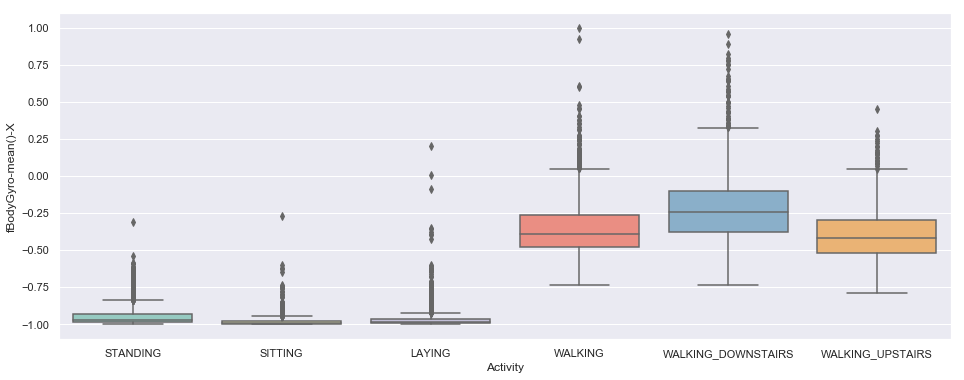

In [4]:
#chart
plt.figure(figsize=(16,6))
sns.boxplot(x="Activity", y="fBodyGyro-mean()-X", data=df, palette="Set3")

Lets check in detail what are the outliers for Activities like 'WALKING' and 'LAYING' as 'WALKING' has some data and few outliers while 'LAYING' has more outliers may be as when person is lying he is mostly not doing any activities so fBodyGyro-mean()-X values may be close to 0 

Text(0.5,0,'WALKING')

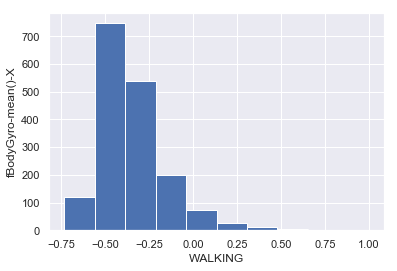

In [11]:
df[df.Activity == 'WALKING']['fBodyGyro-mean()-X'].hist()
plt.ylabel('fBodyGyro-mean()-X')
plt.xlabel('WALKING')

Text(0.5,0,'LAYING')

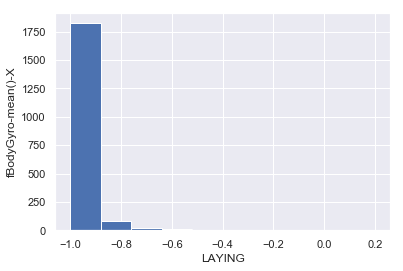

In [19]:
df[df.Activity == 'LAYING']['fBodyGyro-mean()-X'].hist()
plt.ylabel('fBodyGyro-mean()-X')
plt.xlabel('LAYING')

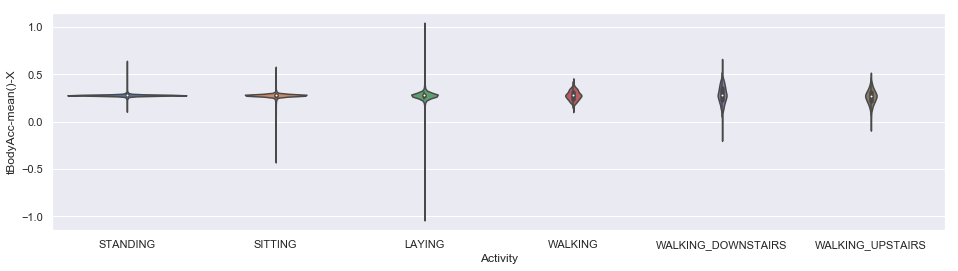

In [42]:
plt.figure(figsize=(16,4))
sns.violinplot(x="Activity", y="tBodyAcc-mean()-X", data=df)

Lets check in detail what are the outliers for Activities like 'WALKING' and 'LAYING' as 'WALKING' has some data and few outliers while 'LAYING' has more outliers may be as when person is lying he is mostly not doing any activities so tBodyAcc-mean()-X values may be close to 0.

Text(0.5,0,'WALKING')

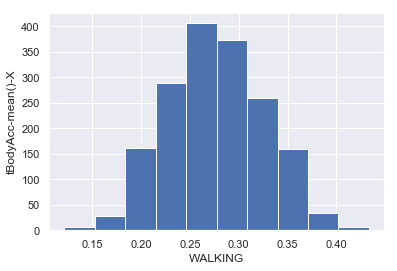

In [20]:
df[df.Activity == 'WALKING']['tBodyAcc-mean()-X'].hist()
plt.ylabel('tBodyAcc-mean()-X')
plt.xlabel('WALKING')

Text(0.5,0,'LAYING')

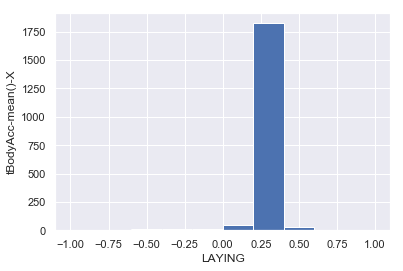

In [21]:
df[df.Activity == 'LAYING']['tBodyAcc-mean()-X'].hist()
plt.ylabel('tBodyAcc-mean()-X')
plt.xlabel('LAYING')

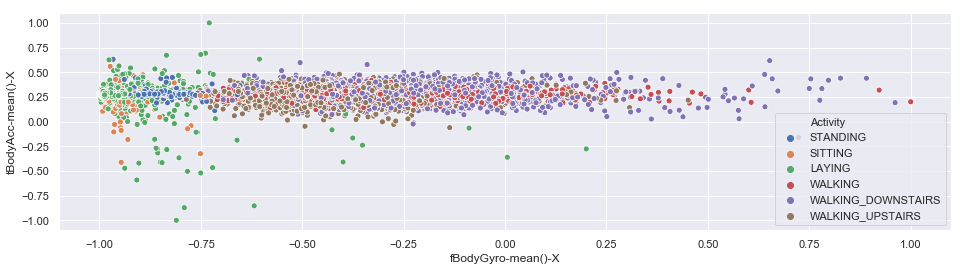

In [13]:
plt.figure(figsize=(16,4))
ax = sns.scatterplot(x="fBodyGyro-mean()-X", y="tBodyAcc-mean()-X", hue='Activity', data=df)

The above graph shows that features measured were mostly below 0 for activities like LAYING, SITTING, STANDING as we don't do much movements during those activities so that could be the reason for these kind of data

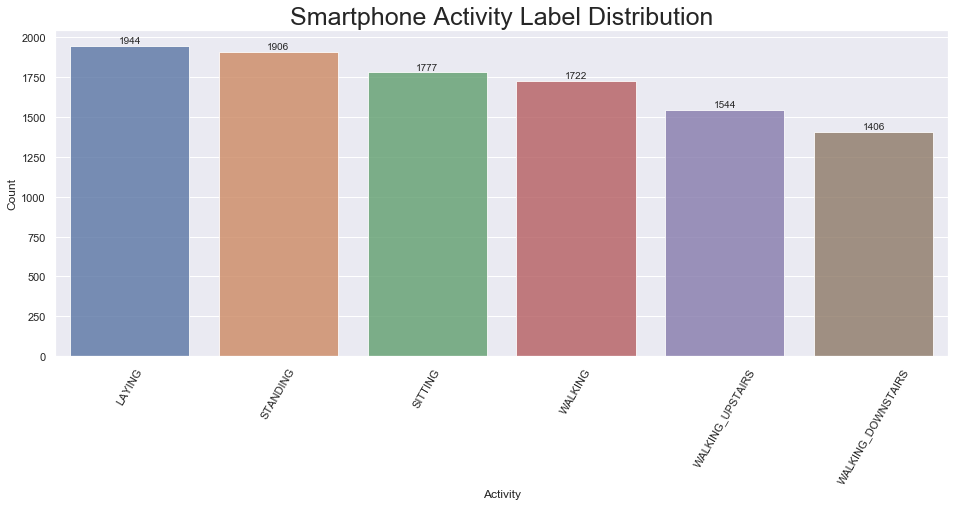

Index(['LAYING', 'STANDING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS',
       'WALKING_DOWNSTAIRS'],
      dtype='object')


In [14]:
# Create label
label = df['Activity']
# Plotting data
x = label.value_counts()

#prep for chart
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,6))
ax = sns.barplot(x.index, x.values, alpha=0.8)#,color=color[5])
plt.title("Smartphone Activity Label Distribution",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=60)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Activity', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()
print(x.index)

Although there are fluctuations in the label counts, the labels are quite equally distributed.

Assuming the participants had to walk the same number of stairs upwards as well as downwards and knowing the smartphones had a constant sampling rate, there should be the same amount of datapoints for walking upstairs and downstairs. 
Disregarding the possibility of flawed data, the participants seem to walk roughly 10% faster downwards.

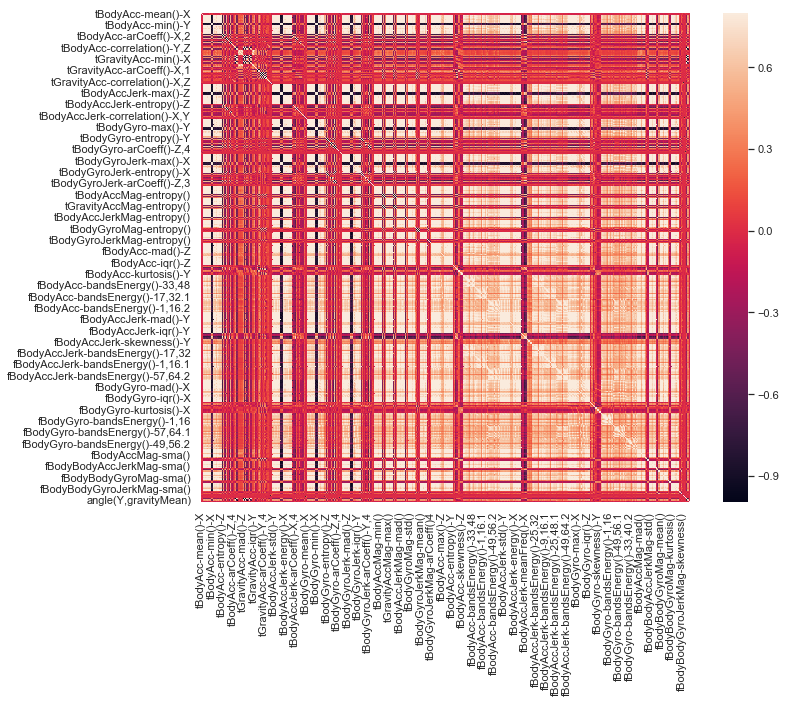

In [15]:
corrmat = df.corr()
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [17]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


### Model Specifications

In [55]:
## Create datasets
model_data = df.copy()
activity_data = model_data.pop('Activity')
subject_data = model_data.pop('subject')
y = df

# Split training testing data
X_train, X_test, y_train, y_test = train_test_split(model_data, activity_data, random_state=3)

In [21]:
X_train.shape

(7724, 561)

In [22]:
## Run all the classification models
classifiers = [
    DecisionTreeClassifier(random_state=3),
    RandomForestClassifier(random_state=3),
    GradientBoostingClassifier(random_state=3),
    KNeighborsClassifier(7), # because there are 6 different labels
    SVC(random_state=3),
    GaussianNB(),
    LogisticRegression(random_state=3),
    XGBClassifier(random_state=3)
]

names = []
scores = []

for clf in classifiers:
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    names.append(clf.__class__.__name__)
    scores.append(accuracy_score(y_pred, y_test))

score_df = pd.DataFrame({'Model': names, 'Score': scores}).set_index('Model')
score_df.sort_values(by='Score', ascending=False)

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Score
Model,
GradientBoostingClassifier,0.984466
LogisticRegression,0.983689
XGBClassifier,0.983301
RandomForestClassifier,0.966602
KNeighborsClassifier,0.961942
SVC,0.958835
DecisionTreeClassifier,0.929709
GaussianNB,0.730874


## Tuning Model 

### GradientBoostingClassifier

In [56]:
# A parameter grid for GradientBoostingClassifier
params = {'n_estimators':[100,200], 'max_depth': [10,20]}

# Initialize GradientBoostingClassifier and GridSearch
clf = GradientBoostingClassifier(random_state=3)

grid = GridSearchCV(clf, params, cv=3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=3, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200], 'max_depth': [10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
grid.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [58]:
best_clf = grid.best_estimator_
score = accuracy_score(y_true=y_test, y_pred=best_clf.predict(X_test))
print('Accuracy on testset:\t{:.4f}\n'.format(score))

Accuracy on testset:	0.9763



In [59]:
# confusion_matrix
y_pred=best_clf.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred),columns = y_test.unique(), index= y_test.unique())

,LAYING,SITTING,STANDING,WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS
LAYING,502,0,0,0,0,0
SITTING,0,422,20,0,0,1
STANDING,0,21,434,0,0,2
WALKING,0,0,0,442,2,2
WALKING_UPSTAIRS,0,0,0,4,334,5
WALKING_DOWNSTAIRS,0,0,0,1,3,380


In [28]:
# cross_val_score
cross_val_score(best_clf, X_train, y_train, cv=5)

array([0.97543633, 0.96636481, 0.97281553, 0.96826425, 0.961738  ])

In [48]:
# classification_report
print(classification_report(y_test, best_clf.predict(X_test), target_names=y_test.unique()))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       502
           SITTING       0.95      0.95      0.95       443
          STANDING       0.96      0.95      0.95       457
           WALKING       0.99      0.99      0.99       446
  WALKING_UPSTAIRS       0.99      0.97      0.98       343
WALKING_DOWNSTAIRS       0.97      0.99      0.98       384

       avg / total       0.98      0.98      0.98      2575



### LogisticRegression

In [45]:
# A parameter grid for LogisticRegression
params = {'C':[1,10], 'penalty':['l1','l2']}
lr = LogisticRegression()

# Initialize LogisticRegression and GridSearch
grid = GridSearchCV(lr, params, cv=3)
grid.fit(X_train, y_train)
best_lr = grid.best_estimator_
score = accuracy_score(y_true=y_test, y_pred=best_lr.predict(X_test))
print('Accuracy on testset:\t{:.4f}\n'.format(score))

Accuracy on testset:	0.9837



In [46]:
grid.best_params_

{'C': 10, 'penalty': 'l1'}

In [33]:
# cross_val_score
cross_val_score(best_lr, X_train, y_train, cv=5)

array([0.98642534, 0.98318241, 0.98576052, 0.9857513 , 0.97859922])

In [51]:
# confusion_matrix
y_pred=best_lr.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred),columns = y_test.unique(), index= y_test.unique())

,LAYING,SITTING,STANDING,WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS
LAYING,502,0,0,0,0,0
SITTING,0,422,21,0,0,0
STANDING,0,20,437,0,0,0
WALKING,0,0,0,446,0,0
WALKING_UPSTAIRS,0,0,0,0,343,0
WALKING_DOWNSTAIRS,0,0,0,1,0,383


In [52]:
# classification_report
print(classification_report(y_test, best_lr.predict(X_test), target_names=y_test.unique()))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       502
           SITTING       0.95      0.95      0.95       443
          STANDING       0.95      0.96      0.96       457
           WALKING       1.00      1.00      1.00       446
  WALKING_UPSTAIRS       1.00      1.00      1.00       343
WALKING_DOWNSTAIRS       1.00      1.00      1.00       384

       avg / total       0.98      0.98      0.98      2575



### PCA

Lets check PCA if that helps to improve our model performance to gain some more accuracy for our prediction models

In [34]:
## Create datasets
model_data = df.copy()
activity_data = model_data.pop('Activity')
subject_data = model_data.pop('subject')
y = df

# Scale data
scl = StandardScaler()
model_data = scl.fit_transform(model_data)

# Reduce dimensions (speed up)
pca = PCA(n_components=0.9, random_state=3)
model_data = pca.fit_transform(model_data)

# Split training testing data
X_train, X_test, y_train, y_test = train_test_split(model_data, activity_data, random_state=3)


In [35]:
## Run all the classification models after PCA
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(7), # because there are 6 different labels
    SVC(),
    GaussianNB(),
    LogisticRegression(),
    XGBClassifier()
]

names = []
scores = []

for clf in classifiers:
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    names.append(clf.__class__.__name__)
    scores.append(accuracy_score(y_pred, y_test))

score_df = pd.DataFrame({'Model': names, 'Score': scores}).set_index('Model')
score_df.sort_values(by='Score', ascending=False)

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Score
Model,
LogisticRegression,0.953398
KNeighborsClassifier,0.946019
GradientBoostingClassifier,0.940583
XGBClassifier,0.927767
SVC,0.919223
RandomForestClassifier,0.887767
DecisionTreeClassifier,0.839612
GaussianNB,0.833398


- Above data analysis shows that PCA is not helping to improve model accuracy as there must be some information loss so we are not considering PCA for improving model performance
- The best performing model is Logistic Regression with improved performance after tuning and prediction accuracy of 98%
- Vanilla gradient boosting without tuning performed the best, with tuning it didnt help much

### Concluding Remarks

- The smartphone has enough data to determine what its user is doing (98%: 6 activities)
- Logistic Regression is giving more accurate and improved performance compared to other classification models. It is way faster than Gradient boost
- This data can be used by many healthcare and fitness apps which can provide more insights
- As the dataset only provide a small amount of data the variance of the results can be high